
<center>
<h1><font size="+3">Gold nanoparticle</font></h1>
</center>

---

<CENTER>
<H1 style="color:red">
Scattering properties
</H1>
</CENTER>

## <font color='red'> Load modules </font>

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
#import sys
#sys.path

#setting:

# Only 10 rows of data will be displayed
pd.set_option("max_rows", 10) 

# Print floating point numbers using fixed point notation
np.set_printoptions(suppress=True)

# Set figure size
#LARGE_FIGSIZE = (8, 6)

font = {#'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

## <font color='red'>Refractive index dataset</font>

- <a href="https://refractiveindex.info/?shelf=3d&book=metals&page=gold">Complex refractive index dataset(n+ik) for bulk gold </a>
- <a href="https://pubs.acs.org/doi/10.1021/ac0702084"> Correction of refractive index for small particle</a>


In [383]:
url = "https://refractiveindex.info/data_csv.php?datafile=data/main/Au/Rakic-BB.yml"
df1 = pd.read_csv(url)

#reorganize data
#original data with n and k in the same columne
index1=df1.index[df1.n=='k'].tolist()[0]
df2=df1[:index1].astype(float)
df2['k']=df1[index1+1:].n.values.astype('float')
df1=df2

#if data are downloaded and stored in local file
#df1=pd.read_csv('./Rakic-BB.csv')
#df1=df1.drop(columns=['wl.1'])
#df1.columns=["Wavelength", "n", "k"]

#change column name and use only wavelength less than 800nm
df1.columns=["Wavelength", "n", "k"]
df1.Wavelength=df1.Wavelength*1000
df1=df1[df1['Wavelength']<800]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Wavelength  73 non-null     float64
 1   n           73 non-null     float64
 2   k           73 non-null     float64
dtypes: float64(3)
memory usage: 2.3 KB


In [385]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Wavelength,73.0,470.141233,159.522011,247.97000,331.77000,443.9000,593.9300,794.6600
n,73.0,1.040926,0.640062,0.16897,0.25437,1.4126,1.6006,1.7411
k,73.0,2.398797,0.883586,1.74790,1.80070,1.9312,2.8493,4.6635


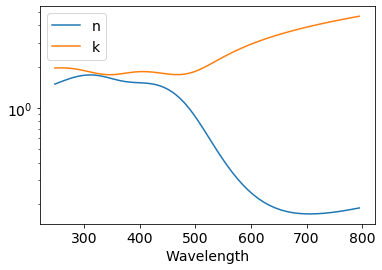

In [388]:
df1.plot(x='Wavelength', y=['n','k'],logy=True)
#df1.plot(subplots=True);

## <font color='red'>Python Mie Code </font>

- <a href="https://pymiescatt.readthedocs.io/en/latest/">PyMieScatt: Python Mie code document</a>
- <a href="https://doi.org/10.1016/j.jqsrt.2017.10.012/">PyMieScatt reference</a>
- Installation through conda: conda install -c conda-forge pymiescatt

In [390]:
import PyMieScatt as ps

#test one case
wavelength=375
diameter=300
nc=1.77+0.63j #complex refractive index
ps.MieQ(nc,wavelength, diameter,asDict=True) #wavelength, diameter

{'Qext': 2.8584971991564117,
 'Qsca': 1.3149276685170943,
 'Qabs': 1.5435695306393173,
 'g': 0.7251162362148784,
 'Qpr': 1.905021797266491,
 'Qback': 0.20145510481352577,
 'Qratio': 0.1532062254349824}

### multiple size and wavelength

In [393]:
df2=df1
#wavelength follow the input file
#convert to nm
wv=df2.Wavelength[::1].values
#n array
nv=df2.n[::1].values
#k array
kv=df2.k[::1].values
#diameter array
dv=np.array(range(30,160,10))

nwv=len(wv)
nd=len(dv)
print("number of wavelength: %i, number of diamters: %i" %(nwv, nd))

number of wavelength: 73, number of diamters: 13


In [394]:
#run the mie code for above parameters
miev=np.array([[ps.MieQ(nv[i]+kv[i]*1.0j,wv[i],dv[j],asDict=True) \
                for j in range(nd)] \
               for i in range(nwv)])
print(miev.shape)

qextv=np.array([[miev[i,j]['Qext'] for j in range(nd)]for i in range(nwv)])
qabsv=np.array([[miev[i,j]['Qabs'] for j in range(nd)]for i in range(nwv)])
gv=np.array([[miev[i,j]['g'] for j in range(nd)]for i in range(nwv)])

qextv.shape

(73, 13)


(73, 13)

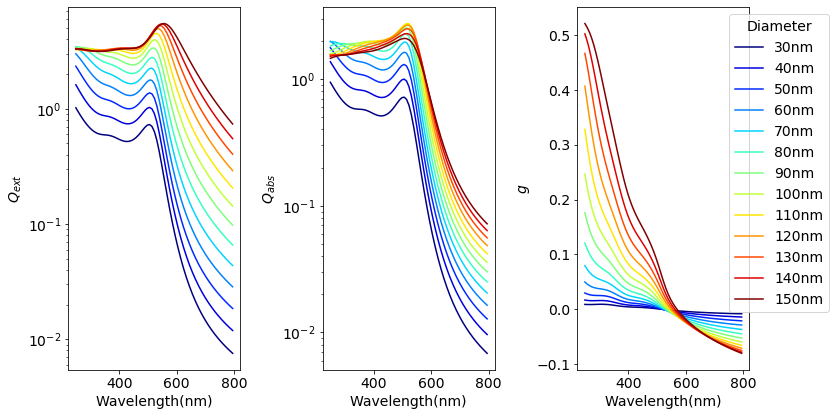

In [395]:

plt.figure(figsize=(12,6))

num_plots=nd

colormap = plt.cm.gist_ncar


ax=plt.subplot(131)
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))

ax.set_yscale('log')
for j in range(nd):
    tmp=plt.plot(wv,qextv[:,j], label=dv[j])

plt.xlabel("Wavelength(nm)")
plt.ylabel("$Q_{ext}$")


ax=plt.subplot(132)
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))

ax.set_yscale('log')
for j in range(nd):
    tmp=plt.plot(wv,qabsv[:,j], label=str(dv[j])+'nm')
plt.ylabel("$Q_{abs}$")
plt.xlabel("Wavelength(nm)")

ax=plt.subplot(133)
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, num_plots))))

#ax.set_yscale('log')
for j in range(nd):
    tmp=plt.plot(wv,gv[:,j], label=str(dv[j])+'nm')
plt.ylabel("$g$")
plt.xlabel("Wavelength(nm)")

plt.legend(bbox_to_anchor=(1.5,1),title="Diameter")
plt.tight_layout()

plt.savefig('/Users/mgao1/Desktop/gold_nanoparticle.pdf')